# Example 3: Digit Dataset (A)
In this example we will work on <strong> Digit Recognition </strong>.<br>
This Dataset contains for each image the values of its $64=8 \times 8$ <strong>greyscale pixels</strong> and the value of the <strong>Digit</strong> <br>
<p style="text-align:center;"><img src="Example3/digits_image.png" class="center"></p>

### NOTE
To execute a cell, press <strong>Shift+Enter</strong>

## 0. Helper Class & Creating custom Images
<code> ImagePredictor </code> is a class that facilates predicting photos <br>
The following images are custom ones that will be used later.

In [1]:
import numpy as np
import cv2
class ImagePredictor:
    def __init__(self,model,dim,max_val=255):
        self.model=model
        self.dim=dim
        self.max_val=max_val
        pass
    
    def fit(X,y):
        model.fit(np.reshape(X,[X.shape[0],dim[0]*dim[1]]),y)
        return self
#Predict a Single Image
    def predict_one(self,img,pix_max_val=255,invert=False):
        img2=np.copy(img)
        img2 = img2.astype(np.float64)
        img2=cv2.resize(img2,self.dim)
        img2= img2*self.max_val/pix_max_val
        if invert:
            img2=self.max_val-img2 
        return self.model.predict([img2.flatten()])[0]
#Predict an array of images (a 3D Array)
    def predict(self,img,pix_max_val=255,invert=False):
        img=img.astype(np.float64)
        img2 = np.zeros([img.shape[0],*self.dim])
        for k in range(img.shape[0]):
            img2[k,:,:]=cv2.resize(img[k,:,:],self.dim)
            img2[k,:,:]= img2[k,:,:]*self.max_val/pix_max_val
            if invert:
                img2[k,:,:]=self.max_val-img2[k,:,:]
#        return np.array([self.predict_one(img2[s,:,:]) for s in range(img.shape[0]) ])
        return self.model.predict(np.reshape(img2,[img2.shape[0],self.dim[0]*self.dim[1]]))
    def score(self,X,y,pix_max_val=255,invert=False):
        return (self.predict(X,pix_max_val,invert)==y).mean()
    
    def unroll(img,pix_max_val=255,invert=False):
        img2 = np.zeros([img.shape[0],*self.dim])
        for k in range(img.shape[0]):
            img2[k,:,:]=cv2.resize(img[k,:,:],self.dim)
            img2[k,:,:]= img2[k,:,:]*self.max_val/pix_max_val
            if invert:
                img2[k,:,:]=self.max_val-img2[k,:,:]
        return img2
        
    pass

#The list of file names for the custom images
file_name_list=["2.png","3.png","8.jpg","4.bmp","5.bmp","5_2.bmp","6.bmp","7.bmp","7.jpg","9.bmp","9.jpg","8.bmp"]
#The digit value of each image, in order
digit_values=np.array([2,3,8,4,5,5,6,7,7,9,9,8])
#Creating a 3D array(Tensor) of 28x28 images
custom_images = np.array([cv2.resize(cv2.imread("Example3/{}".format(s),cv2.IMREAD_GRAYSCALE),(28,28)) 
        for s in file_name_list])
print("Good Job!")

Good Job!


## 1. Importing Libraries
We will need 
- numpy (NumPy) for arrays
- pandas (Pandas) for data manipulation
- matplotlib for visualisation
- sklearn (Scikit-Learn) for creating, fitting and evaluating the model
- seaborn (Seaborn), which gives a simpler syntax for visualisation 

In [2]:
#sklearn.datasets contains some predefined datasets
import sklearn.datasets as ds
#pandas is used for data manipulation
import pandas as pd
#matplotlib.pyplot is used for visualisation
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as grd
#seaborn is a user friendly library for visualisation built on top of matplotlib
import seaborn as sns
#we will use a Classification Model called SVC: Support Vector Classifier
import sklearn.datasets as ds
from sklearn.svm import SVC
#we will compare it to a linear Model: LogisticRegression
from sklearn.linear_model import LogisticRegression
#we will split the data using train_test_split
from sklearn.model_selection import train_test_split
#OPTIONAL: This is for evaluating a classification model
from sklearn.metrics import confusion_matrix
print("Libraries are Imported")

Libraries are Imported


## 2. Preprocessing: Loading Digits Dataset
We will Load here The Digits Dataset <br>
We will then Load the $X$ values and $y$ values<br>

In [3]:
#Load the Digits dataset
digits_dataset=ds.load_digits()
#X is a DataFrame (Matrix/2D array) containing the pixels of each digit in the dataset 
X=pd.DataFrame(digits_dataset["data"])
#y is the digit itself for every image, respecting the order 
#y is a vector (Series/1D array)
y=pd.Series(digits_dataset["target"],name ="digit")
feature_names = digits_dataset["feature_names"]
X.columns=feature_names
print("Data Successfully Preprocessed")

Data Successfully Preprocessed


### Counting observations

In [ ]:
#This is an example of unrolling a list
#The unrolled list is X.shape
print("This Dataset contains {} obersvation(s)\nEach observation has {} feature(s)".format(*X.shape))

### Viewing a sample of $X$
Feel free to change the number of samples

In [4]:
X.head(12)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,4.0,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0


### Viewing the first elements of $y$
Feel free to change the number below

In [ ]:
y.head(12)

## 3. Analysing Data
### Merging Tables
To Analyse data, sometimes, it maybe simpler to combine the data to one table 

In [5]:
U=pd.concat([X,y],axis=1)
#To see the last 10 examples
U.tail(10)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,digit
1787,0.0,0.0,10.0,16.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,4.0,0.0,0.0,5
1788,0.0,0.0,0.0,1.0,12.0,6.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,14.0,9.0,0.0,0.0,4
1789,0.0,0.0,8.0,16.0,3.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,10.0,16.0,10.0,1.0,0.0,0.0,8
1790,0.0,0.0,5.0,12.0,8.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,12.0,12.0,3.0,0.0,0.0,8
1791,0.0,0.0,0.0,3.0,15.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,16.0,4.0,0.0,0.0,4
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9
1796,0.0,0.0,10.0,14.0,8.0,1.0,0.0,0.0,0.0,2.0,...,0.0,0.0,1.0,8.0,12.0,14.0,12.0,1.0,0.0,8


### Plotting Digits

Text(0.5, 1.0, '$Digit: 9$')

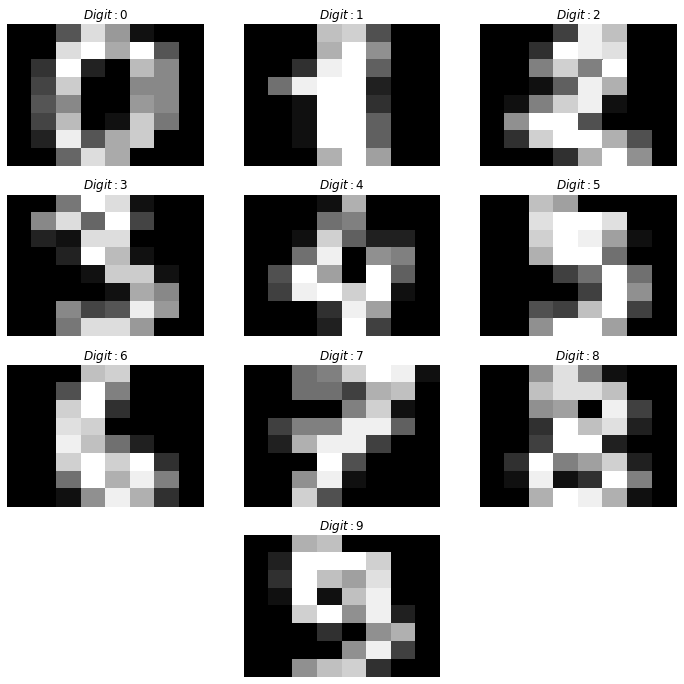

In [6]:
#Plotting digits
fig = plt.figure(figsize=(12,12))
#A grid spec is a grid layout
spec = grd.GridSpec(ncols=3,nrows=4)
for i in range(3):
    for j in range(3):
        d=3*i+j
        ax = fig.add_subplot(spec[i,j])
        digit_matrix=np.reshape(X.iloc[d,:].to_numpy(),[8,8])
        ax=sns.heatmap(digit_matrix,cmap="gray",ax=ax,cbar=False,xticklabels=False,yticklabels=False)
        ax.set_title("$Digit: {}$".format(y[d]))
ax = fig.add_subplot(spec[3,1])
digit_matrix=np.reshape(X.iloc[9,:].to_numpy(),[8,8])
ax=sns.heatmap(digit_matrix,cmap="gray",ax=ax,cbar=False,xticklabels=False,yticklabels=False)
ax.set_title("$Digit: {}$".format(y[9]))

## 4. Model Selection
### Creating Train & Test Sets
We will Create a training set that is used to fit our model<br>
The training data is a random sample of size $70\%$ of the iris dataset

In [7]:
#This is an example of multiple return values in Python
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=.7)
print("Train/Test Data Successfully created")

Train/Test Data Successfully created


### Creating & Fitting Model
Here we will create two models: 
1. a LogisticRegression model
2. an SVC model (Support Vector Classifier)

We will fit each model against the <strong>training data</strong><br>
Feel free to change the constant $C>0$ of each model and see how it affects accuarcy

In [8]:
#Creating SVC Model
svc_model = SVC()
#Fitting Model
svc_model.fit(X_train,y_train)

#Creating LogisticRegression Model
linear_model =LogisticRegression()
#fitting linear model
linear_model.fit(X_train,y_train)
print("Model is now Fit")

Model is now Fit


C:\Users\Rami\anaconda3\envs\workaround\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## 5. Evaluating Model
### a. Evaluating on the Testing Dataset
We will evaluate the accuarcy of our model with the <strong>testing data</strong>

SVC Model has an accuarcy of 99.074%
Linear Model has an accuarcy of 97.963%


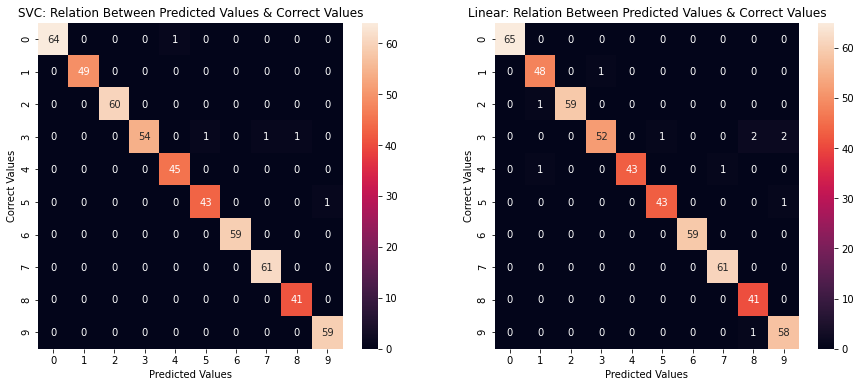

In [9]:
#This function evaluates a list of models
#models is the list of models, models_names is the list of the names of each model
def evaluate_models(models,models_names,X_test,y_test):
    fig,axs= plt.subplots(1,len(models),figsize=(15,6))
    k=0
    for model,name in zip(models,models_names):
        accuarcy=model.score(X_test,y_test)
        print("{} Model has an accuarcy of {:.3f}%".format(name,100*accuarcy))
        axs[k]
        sns.heatmap(confusion_matrix(y_test,model.predict(X_test)),annot=True,ax=axs[k])
        axs[k].set_title("{}: Relation Between Predicted Values & Correct Values".format(name))
        axs[k].set_ylabel("Correct Values")
        axs[k].set_xlabel("Predicted Values");
        k=k+1

#This call will evaluate both models
evaluate_models([svc_model,linear_model],["SVC","Linear"],X_test,y_test)

### b. Testing on other custom Images
<table>
    <tr>
        <td><img src="Example3/0.bmp" width="32" height="32"></td>         
        <td><img src="Example3/2.png" width="32" height="32"></td>         
        <td><img src="Example3/3.png" width="32" height="32"></td>
    </tr>
    <tr>
        <td><img src="Example3/4.bmp" width="32" height="32"></td>         
        <td><img src="Example3/5.bmp" width="32" height="32"></td>         
        <td><img src="Example3/5_2.bmp" width="32" height="32"></td>
    </tr>
    <tr>
        <td><img src="Example3/6.bmp" width="32" height="32"></td>         
        <td><img src="Example3/7.bmp" width="32" height="32"></td>         
        <td><img src="Example3/7.jpg" width="32" height="32"></td>
    </tr>
    <tr>
        <td><img src="Example3/8.bmp" width="32" height="32"></td>         
        <td><img src="Example3/9.bmp" width="32" height="32"></td>         
        <td><img src="Example3/9.bmp" width="32" height="32"></td>
    </tr>
</table>
Well, such results may be outstandingly good. But does it generalise well to <strong>new data?</strong><br>
We will test this <strong>model</strong> on some <strong>randomly</strong> chosen digit images from <strong>the internet.</strong>

In [ ]:
#Select a model from the two defined above
predictor= ImagePredictor(svc_model,(8,8),16)
print("The accuarcy of the selected model is {:.3f}".format(predictor.score(custom_images,digit_values,invert=True)))

# Improving Digit Prediction: MNIST Dataset (B)
- This is way more <strong>advanced</strong> than what <strong>we have seen</strong>, so prepare yourself.
- We <strong>recommend</strong> that you give it <strong>another try</strong> at your <strong>free time</strong>.<br>
In this example we will work on Digit Recognition with the <strong>MNIST Dataset</strong>.<br>
<p style="text-align:center;"><img src="Example3/mnist_image.png"></p><br>
This Dataset contains for each image the values of its  784=28×28  greyscale pixels and the value of the Digit

## 1. Importing MNIST
### Reading from a CSV file
The code below imports the <strong>MNIST dataset</strong> (both training and testing) from csv files.<br>
It then it shows a sample from the dataset

In [10]:
mnist_train=pd.read_csv("Example3/mnist_train.csv")
mnist_test=pd.read_csv("Example3/mnist_test.csv")
mnist_train.head(10)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Creating $X$ & $y$ arrays

In [13]:
X_mnist_train = mnist_train[mnist_train.columns[1:]]
y_mnist_train=mnist_train["label"]
X_mnist_test = mnist_test[mnist_test.columns[1:]]
y_mnist_test=mnist_test["label"]
#To Save Some memory
mnist_train=None
mnist_test=None

AttributeError: 'NoneType' object has no attribute 'columns'

## 2. Viewing some digits
Feel free to change <code>ncols</code> and <code>nrows</code>, we recommend you set each one of them between $1$ & $5$

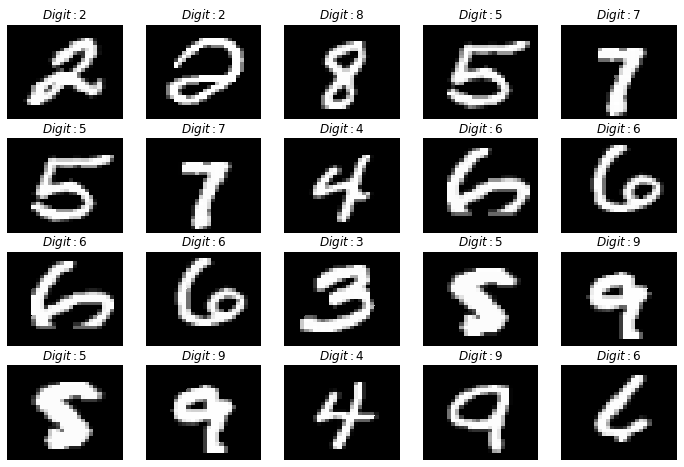

In [14]:
#Ploting MNIST digits
fig = plt.figure(figsize=(12,8))
#This is the number of columns of the plot
ncols=5
#This is the number of rows of the plot
nrows=4
spec = grd.GridSpec(ncols=ncols,nrows=nrows)
X_mnist_sample=X_mnist_train.sample(nrows*ncols)
y_mnist_sample=y_mnist_train[X_mnist_sample.index]
for i in range(nrows):
    for j in range(ncols):
        d=3*i+j
        ax = fig.add_subplot(spec[i,j])
        digit_matrix=np.reshape(X_mnist_sample.iloc[d,:].to_numpy(),[28,28])
        ax=sns.heatmap(digit_matrix,cmap="gray",ax=ax,cbar=False,xticklabels=False,yticklabels=False)
        ax.set_title("$Digit: {}$".format(y_mnist_sample.iloc[d]))

## 3. Creating MNIST Models
This can be considered an improvement of Example 3<br>
### a. Model 1: <strong>a Pipeline</strong> (Classical Machine Learning)
We will use a <strong>pipeline</strong> composed of a:
- scaler: StandardScaler To scale data
- dimensionality_reduction: PCA to (in some sense) remove non-necessary variables/pixels
- predictor: SVC to fit and predict data

this model will automatically scale data before every operation, which will ensure better performance especially for SVC models.<br>


In [ ]:
#A pipeline is a way to connect models to create a more powerful model
from sklearn.pipeline import Pipeline
#A StandardScaler is a model that outputs the dataset scaled: with 0 mean and unit variance
from sklearn.preprocessing import StandardScaler
#A PCA: Principal Component Analysis, It lets you to extract the direction which are the most used for predictions
from sklearn.decomposition import PCA
mnist_model = Pipeline([("scaler",StandardScaler()),("dimensionality_reduction",PCA(n_components=32)),("predictor",SVC(C=1))])

### b. Model 2: <strong>Convolutional Neural Network</strong>
- A <strong>Convolutional Neural Network</strong> Is a neural network with some convolution layers
- A <strong>convolution</strong> is an <strong>operation</strong> on <strong>image</strong> which <strong>gives</strong> an other <strong>image</strong>. It is usually used for sharpening, blurring and edge detection.
<br>
<p style="text-align:center">"<img src="Example3/convolution_image.jpg"></p>

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD
from keras.utils import to_categorical
import matplotlib.pyplot as plt

deep_model = tf.keras.Sequential([
#A convolution: for edge detection (hopefully)
    tf.keras.layers.Conv2D(32,3,activation="relu",input_shape=(28,28,1),kernel_initializer="he_uniform"),
#Normalizing Data, similar to StandardScaler in classical machine learning
    tf.keras.layers.BatchNormalization(),
#Max pooling layer, to extract the pixel with maximum edge value
    tf.keras.layers.MaxPooling2D((2,2)),
#Converting each matrix (image) to vector 
    tf.keras.layers.Flatten(),
#From now we have a standard neural network
    tf.keras.layers.Dense(100,activation="relu",kernel_initializer="he_uniform"),
        tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10,activation="softmax")
])

Using TensorFlow backend.


## 4. Fitting Models
### a. Fitting Model 1
<h3 style="color:red;"><strong>WARNING:</strong></h3>
The training can take from <strong>$2$ minutes</strong> to <strong>$10$ minutes </strong>..<br>
Maybe have a coffe with your friends?

In [ ]:
mnist_model.fit(X_mnist_train,y_mnist_train)
print("Pipeline is now fit")

### b. Fitting Model 2
This may seem like some <strong>cryptic code,</strong> but just a little practice and you will get used to it.<br>
This code compile the <strong>CNN</strong> (Convolutional Neural Network):
- The Used Mathematical optimiser is the Stochastic Gradient Descent with learning rate $\alpha=0.01$ and momentum $\mu=0.9$
- The Loss Function $\mathcal{L}$ is the Categorical Cross Entropy
- Let $n$ be the number of observations (<code>n=X.shape[0]</code>), The input $X$ is converted to NumPy array $X'$, rescaled, and converted to the shape $s=(n,28,28,1)$.
- $y$ is converted using the function <code>to_categorical</code> to a categorical format $y'$
- The model is fit against $X'$ and $y'$

<h3 style="color:red;"><strong>WARNING:</strong></h3>
The training can take <strong>$10$ minutes </strong>..<br>
What about playing some card games?

In [16]:
#Invert greyscale of an image, max_col is the maximum value of a colour
def invert(img,max_color=255):
    return max_color-img

#Rescale pixel values to the closed interval [0,1]
def rescale(img,max_color=255):
    return img/max_color

#Add a dummy dimension
def convert_img_dataset(X,n1,n2):
    return np.reshape(X,[X.shape[0],n1,n2,1]) 

#This Neural Network will be optimized with Stochastic Gradient Descent (SGC) with learning rate 0.01 and momentum 0.9
#The loss function is the Categorical Cross Entropy (Categorical Logistic Loss Function)
#The metric of the loss is accuarcy
deep_model.compile(optimizer=SGD(lr=0.01,momentum=0.9),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
deep_model.fit(convert_img_dataset(rescale(X_mnist_train.to_numpy().astype(np.float32)),28,28),
          to_categorical(y_mnist_train),epochs=1,batch_size=32)
print("CNN Model is now fit")

1875/1875 [==============================] - 63s 33ms/step - loss: 0.2159 - accuracy: 0.9350
CNN Model is now fit


## 4. MNIST Model Evaluation
### a. Pipeline Model

In [ ]:
print("Testing Dataset Accuarcy: {:.3f}".format(mnist_model.score(X_mnist_test,y_mnist_test)))
mnist_digit_predictor=ImagePredictor(mnist_model,(28,28))
print("Custom Images Accuarcy: {:.3f}".format(mnist_digit_predictor.score(custom_images,digit_values,255,invert=True)))

### b. CNN Model

In [21]:
def add_dummy_dimension(I):
    return np.reshape(I,[*I.shape,1])

cnn_testing_eval=deep_model.evaluate(rescale(convert_img_dataset(X_mnist_test.to_numpy(),28,28)),to_categorical(y_mnist_test))
cnn_custom_eval=deep_model.evaluate(add_dummy_dimension(rescale(invert(custom_images))),to_categorical(digit_values))
print("Testing Dataset Accuarcy: {:.3f}".format(cnn_testing_eval[1]))
print("Custom Images Accuarcy: {:.3f}".format(cnn_custom_eval[1]))


1/1 [==============================] - 0s 15ms/step - loss: 0.4983 - accuracy: 0.8333
Testing Dataset Accuarcy: 0.984
Custom Images Accuarcy: 0.833


# Conclusion
1. When we compare the Digits Dataset and MNIST Dataset, we conclude that a model with more features (pixels) will give better results.
2. Given <strong>enough data</strong> and <strong>good design</strong>, a Deep Learning Model can easily outperform Classical Machine Learning Algorithms  